## Chloe Quinto 
CS 583 HW 1  
4/13/20      

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import h5py
import numpy as np
import matplotlib.pyplot as plt 

import sklearn 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras import models 
from keras.layers import Dense
from keras import optimizers 
from keras.callbacks import ModelCheckpoint

import tensorflow as tf


Using TensorFlow backend.


# 1. Preprocessing 

### 1.1 Load Dataset 

In [2]:
wine = sklearn.datasets.load_wine()

print("Wine Features:", wine.feature_names)
print('\n')
print("Wine Data:", wine.data)
print('\n')
print("Wine Target:", wine.target)

Wine Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Wine Data: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Wine Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

### 1.2 Build Dataframe 

In [3]:
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df["class"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 1.3 Check for Null Values 

In [4]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

### 1.4 Partition data into training and testing set

In [5]:
labels = df.loc[:,["class"]] 
features = df.drop(["class"],axis=1)
print(labels.shape)
print(features.shape)

(178, 1)
(178, 13)


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels)

In [7]:
#convet class vectirs to binary class matrices
ytrain = to_categorical(ytrain, 3)
ytest = to_categorical(ytest,3)

In [8]:
print("xtrain", xtrain.shape)
print("xtest", xtest.shape)
print("ytrain", ytrain.shape)
print("ytest", ytest.shape)

xtrain (133, 13)
xtest (45, 13)
ytrain (133, 3)
ytest (45, 3)


In [9]:
# scale data between 0 and 1 
scale = MinMaxScaler(feature_range=(0,1))
xtrain = scale.fit_transform(xtrain)
xtest = scale.fit_transform(xtest)

### 1.5  Randomly partition the training set to training and validation sets 

Randomly partition the 133 training samples into two sets 
* a training set containing  100 samples 
* a validation set containing 33 samples 

In [10]:
rand_idx = np.random.permutation(133)
train_idx = rand_idx[0:100]
valid_idx = rand_idx[100:133]

xval = xtrain[valid_idx,:]
yval = ytrain[valid_idx,:]

xtr = xtrain[train_idx, :]
ytr = ytrain[train_idx,:]

print("Shape of xtrain: ", xtr.shape)
print("Shape of ytrain: ", ytr.shape)
print("Shape of xval: ", xval.shape)
print("Shape of yval: ", yval.shape)

Shape of xtrain:  (100, 13)
Shape of ytrain:  (100, 3)
Shape of xval:  (33, 13)
Shape of yval:  (33, 3)


# 2. Build NN and tune its hyper-parameters

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=13,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


###  2.1 Initial Weights and Biases 

In [12]:
print("Weights", model.layers[0].get_weights()[0])
print("\n")
print("Bias", model.layers[0].get_weights()[1])

Weights [[-3.70448530e-01  3.32352519e-01  4.22885060e-01 -8.12618434e-02
  -4.37787414e-01  4.42377388e-01 -1.90993994e-01 -4.84224051e-01
   1.24496102e-01  1.03780508e-01]
 [-2.27323711e-01 -5.08443296e-01 -2.39002705e-03  1.45905733e-01
   7.09608197e-02  3.48710775e-01 -4.80320007e-01 -3.54394674e-01
   5.03659248e-04  1.05182111e-01]
 [-1.90809876e-01 -4.35059071e-01  3.85677576e-01  4.39620078e-01
   2.47027099e-01  4.06515598e-03  1.02122545e-01  2.48960495e-01
   4.17543948e-01  4.40763056e-01]
 [-9.10378993e-02  1.08857751e-02  3.13569248e-01  1.92395270e-01
   2.63221860e-01  1.96473181e-01 -1.33932769e-01 -1.29460156e-01
   4.81677055e-01  3.08601975e-01]
 [ 3.08840632e-01  3.93425763e-01  1.40744746e-01  3.57930481e-01
  -1.55493826e-01 -1.02796078e-01  1.01155639e-02 -1.18642569e-01
   3.04583430e-01 -4.82010216e-01]
 [-4.77569133e-01 -2.59871364e-01 -2.29444385e-01  4.46688414e-01
   4.61134136e-01 -2.88858652e-01  5.26648760e-02 -1.99660361e-01
   1.58015251e-01 -4.6140

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 367
Trainable params: 367
Non-trainable params: 0
________________________________________________________

In [14]:
model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])

### 2.2 Save the weights of our model

In [15]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor="loss", verbose=1, save_best_only = True, mode="auto", period=1)

In [16]:
history = model.fit(xtr, ytr, batch_size=50, epochs=2000, verbose =1, validation_data=(xval,yval), callbacks=[checkpoint])



Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 33 samples
Epoch 1/2000
100/100 [==============================] - 0s 2ms/step - loss: 1.1032 - acc: 0.2700 - val_loss: 1.1022 - val_acc: 0.2121

Epoch 00001: loss improved from inf to 1.10322, saving model to best_model.hdf5
Epoch 2/2000
100/100 [==============================] - 0s 50us/step - loss: 1.0976 - acc: 0.2700 - val_loss: 1.0989 - val_acc: 0.2424

Epoch 00002: loss improved from 1.10322 to 1.09760, saving model to best_model.hdf5
Epoch 3/2000
100/100 [==============================] - 0s 75us/step - loss: 1.0940 - acc: 0.2700 - val_loss: 1.0960 - val_acc: 0.2727

Epoch 00003: loss improved from 1.09760 to 1.09401, saving model to best_model.hdf5
Epoch 4/2000
100/100 [==============================] - 0s 117us/step - loss: 1.0917 - acc: 0.3300 - val_loss: 1.0936 - val_acc: 0.3333

Epoch 00004: loss improved from 1.09401 to 1.09172, saving model to best_model.hdf5
Epoch 5/2000
100/100 [=========

Epoch 37/2000
100/100 [==============================] - 0s 56us/step - loss: 0.9660 - acc: 0.7000 - val_loss: 0.9939 - val_acc: 0.5758

Epoch 00037: loss improved from 0.97212 to 0.96604, saving model to best_model.hdf5
Epoch 38/2000
100/100 [==============================] - 0s 61us/step - loss: 0.9616 - acc: 0.7000 - val_loss: 0.9894 - val_acc: 0.5758

Epoch 00038: loss improved from 0.96604 to 0.96159, saving model to best_model.hdf5
Epoch 39/2000
100/100 [==============================] - 0s 59us/step - loss: 0.9552 - acc: 0.7000 - val_loss: 0.9857 - val_acc: 0.5758

Epoch 00039: loss improved from 0.96159 to 0.95521, saving model to best_model.hdf5
Epoch 40/2000
100/100 [==============================] - 0s 49us/step - loss: 0.9502 - acc: 0.7000 - val_loss: 0.9813 - val_acc: 0.5758

Epoch 00040: loss improved from 0.95521 to 0.95017, saving model to best_model.hdf5
Epoch 41/2000
100/100 [==============================] - 0s 51us/step - loss: 0.9448 - acc: 0.7000 - val_loss: 0.977

100/100 [==============================] - 0s 75us/step - loss: 0.7490 - acc: 0.7100 - val_loss: 0.8288 - val_acc: 0.6364

Epoch 00074: loss improved from 0.75415 to 0.74897, saving model to best_model.hdf5
Epoch 75/2000
100/100 [==============================] - 0s 63us/step - loss: 0.7432 - acc: 0.7100 - val_loss: 0.8248 - val_acc: 0.6364

Epoch 00075: loss improved from 0.74897 to 0.74319, saving model to best_model.hdf5
Epoch 76/2000
100/100 [==============================] - 0s 75us/step - loss: 0.7366 - acc: 0.7100 - val_loss: 0.8209 - val_acc: 0.6364

Epoch 00076: loss improved from 0.74319 to 0.73663, saving model to best_model.hdf5
Epoch 77/2000
100/100 [==============================] - 0s 67us/step - loss: 0.7302 - acc: 0.7100 - val_loss: 0.8173 - val_acc: 0.6061

Epoch 00077: loss improved from 0.73663 to 0.73024, saving model to best_model.hdf5
Epoch 78/2000
100/100 [==============================] - 0s 76us/step - loss: 0.7244 - acc: 0.7100 - val_loss: 0.8123 - val_acc: 0

100/100 [==============================] - 0s 85us/step - loss: 0.5487 - acc: 0.7600 - val_loss: 0.6685 - val_acc: 0.6364

Epoch 00111: loss improved from 0.55671 to 0.54867, saving model to best_model.hdf5
Epoch 112/2000
100/100 [==============================] - 0s 84us/step - loss: 0.5460 - acc: 0.7600 - val_loss: 0.6654 - val_acc: 0.6364

Epoch 00112: loss improved from 0.54867 to 0.54596, saving model to best_model.hdf5
Epoch 113/2000
100/100 [==============================] - 0s 60us/step - loss: 0.5397 - acc: 0.7600 - val_loss: 0.6607 - val_acc: 0.6364

Epoch 00113: loss improved from 0.54596 to 0.53974, saving model to best_model.hdf5
Epoch 114/2000
100/100 [==============================] - 0s 56us/step - loss: 0.5354 - acc: 0.7500 - val_loss: 0.6566 - val_acc: 0.6364

Epoch 00114: loss improved from 0.53974 to 0.53541, saving model to best_model.hdf5
Epoch 115/2000
100/100 [==============================] - 0s 66us/step - loss: 0.5319 - acc: 0.7600 - val_loss: 0.6527 - val_ac

100/100 [==============================] - 0s 57us/step - loss: 0.3866 - acc: 0.8800 - val_loss: 0.4916 - val_acc: 0.8182

Epoch 00148: loss improved from 0.38832 to 0.38655, saving model to best_model.hdf5
Epoch 149/2000
100/100 [==============================] - 0s 60us/step - loss: 0.3790 - acc: 0.8900 - val_loss: 0.4867 - val_acc: 0.8182

Epoch 00149: loss improved from 0.38655 to 0.37897, saving model to best_model.hdf5
Epoch 150/2000
100/100 [==============================] - 0s 47us/step - loss: 0.3717 - acc: 0.9000 - val_loss: 0.4823 - val_acc: 0.8182

Epoch 00150: loss improved from 0.37897 to 0.37170, saving model to best_model.hdf5
Epoch 151/2000
100/100 [==============================] - 0s 47us/step - loss: 0.3680 - acc: 0.8900 - val_loss: 0.4780 - val_acc: 0.8182

Epoch 00151: loss improved from 0.37170 to 0.36800, saving model to best_model.hdf5
Epoch 152/2000
100/100 [==============================] - 0s 103us/step - loss: 0.3634 - acc: 0.8900 - val_loss: 0.4735 - val_a

Epoch 186/2000
100/100 [==============================] - 0s 59us/step - loss: 0.2320 - acc: 0.9700 - val_loss: 0.3411 - val_acc: 0.8485

Epoch 00186: loss improved from 0.23906 to 0.23202, saving model to best_model.hdf5
Epoch 187/2000
100/100 [==============================] - 0s 60us/step - loss: 0.2340 - acc: 0.9600 - val_loss: 0.3412 - val_acc: 0.8788

Epoch 00187: loss did not improve from 0.23202
Epoch 188/2000
100/100 [==============================] - 0s 54us/step - loss: 0.2268 - acc: 0.9800 - val_loss: 0.3355 - val_acc: 0.8788

Epoch 00188: loss improved from 0.23202 to 0.22681, saving model to best_model.hdf5
Epoch 189/2000
100/100 [==============================] - 0s 60us/step - loss: 0.2240 - acc: 0.9700 - val_loss: 0.3339 - val_acc: 0.8788

Epoch 00189: loss improved from 0.22681 to 0.22398, saving model to best_model.hdf5
Epoch 190/2000
100/100 [==============================] - 0s 67us/step - loss: 0.2192 - acc: 0.9700 - val_loss: 0.3297 - val_acc: 0.8485

Epoch 00190

Epoch 224/2000
100/100 [==============================] - 0s 77us/step - loss: 0.1339 - acc: 0.9800 - val_loss: 0.2545 - val_acc: 0.8788

Epoch 00224: loss did not improve from 0.13378
Epoch 225/2000
100/100 [==============================] - 0s 67us/step - loss: 0.1297 - acc: 0.9900 - val_loss: 0.2524 - val_acc: 0.8788

Epoch 00225: loss improved from 0.13378 to 0.12970, saving model to best_model.hdf5
Epoch 226/2000
100/100 [==============================] - 0s 58us/step - loss: 0.1271 - acc: 0.9900 - val_loss: 0.2534 - val_acc: 0.8788

Epoch 00226: loss improved from 0.12970 to 0.12711, saving model to best_model.hdf5
Epoch 227/2000
100/100 [==============================] - 0s 53us/step - loss: 0.1273 - acc: 0.9800 - val_loss: 0.2492 - val_acc: 0.8788

Epoch 00227: loss did not improve from 0.12711
Epoch 228/2000
100/100 [==============================] - 0s 69us/step - loss: 0.1303 - acc: 0.9500 - val_loss: 0.2600 - val_acc: 0.9394

Epoch 00228: loss did not improve from 0.12711
E

100/100 [==============================] - 0s 86us/step - loss: 0.0708 - acc: 1.0000 - val_loss: 0.2266 - val_acc: 0.9394

Epoch 00263: loss improved from 0.07373 to 0.07079, saving model to best_model.hdf5
Epoch 264/2000
100/100 [==============================] - 0s 46us/step - loss: 0.0699 - acc: 0.9900 - val_loss: 0.2173 - val_acc: 0.9394

Epoch 00264: loss improved from 0.07079 to 0.06992, saving model to best_model.hdf5
Epoch 265/2000
100/100 [==============================] - 0s 42us/step - loss: 0.0689 - acc: 1.0000 - val_loss: 0.2306 - val_acc: 0.9394

Epoch 00265: loss improved from 0.06992 to 0.06892, saving model to best_model.hdf5
Epoch 266/2000
100/100 [==============================] - 0s 75us/step - loss: 0.0737 - acc: 0.9900 - val_loss: 0.2302 - val_acc: 0.9394

Epoch 00266: loss did not improve from 0.06892
Epoch 267/2000
100/100 [==============================] - 0s 53us/step - loss: 0.0732 - acc: 0.9900 - val_loss: 0.2277 - val_acc: 0.9394

Epoch 00267: loss did not 

100/100 [==============================] - 0s 59us/step - loss: 0.0388 - acc: 1.0000 - val_loss: 0.2036 - val_acc: 0.9394

Epoch 00302: loss did not improve from 0.03815
Epoch 303/2000
100/100 [==============================] - 0s 83us/step - loss: 0.0368 - acc: 1.0000 - val_loss: 0.2180 - val_acc: 0.9394

Epoch 00303: loss improved from 0.03815 to 0.03679, saving model to best_model.hdf5
Epoch 304/2000
100/100 [==============================] - 0s 46us/step - loss: 0.0369 - acc: 1.0000 - val_loss: 0.2173 - val_acc: 0.9394

Epoch 00304: loss did not improve from 0.03679
Epoch 305/2000
100/100 [==============================] - 0s 83us/step - loss: 0.0358 - acc: 1.0000 - val_loss: 0.2073 - val_acc: 0.9394

Epoch 00305: loss improved from 0.03679 to 0.03575, saving model to best_model.hdf5
Epoch 306/2000
100/100 [==============================] - 0s 51us/step - loss: 0.0341 - acc: 1.0000 - val_loss: 0.2065 - val_acc: 0.9394

Epoch 00306: loss improved from 0.03575 to 0.03406, saving mode

Epoch 342/2000
100/100 [==============================] - 0s 66us/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.2134 - val_acc: 0.9394

Epoch 00342: loss improved from 0.01744 to 0.01667, saving model to best_model.hdf5
Epoch 343/2000
100/100 [==============================] - 0s 53us/step - loss: 0.0187 - acc: 1.0000 - val_loss: 0.2322 - val_acc: 0.9394

Epoch 00343: loss did not improve from 0.01667
Epoch 344/2000
100/100 [==============================] - 0s 102us/step - loss: 0.0173 - acc: 1.0000 - val_loss: 0.1996 - val_acc: 0.9394

Epoch 00344: loss did not improve from 0.01667
Epoch 345/2000
100/100 [==============================] - 0s 79us/step - loss: 0.0165 - acc: 1.0000 - val_loss: 0.2162 - val_acc: 0.9394

Epoch 00345: loss improved from 0.01667 to 0.01647, saving model to best_model.hdf5
Epoch 346/2000
100/100 [==============================] - 0s 67us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.1939 - val_acc: 0.9394

Epoch 00346: loss improved from 0.01647 to 0.01


Epoch 00381: loss did not improve from 0.00663
Epoch 382/2000
100/100 [==============================] - 0s 66us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2313 - val_acc: 0.9394

Epoch 00382: loss improved from 0.00663 to 0.00653, saving model to best_model.hdf5
Epoch 383/2000
100/100 [==============================] - 0s 73us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.2416 - val_acc: 0.9394

Epoch 00383: loss did not improve from 0.00653
Epoch 384/2000
100/100 [==============================] - 0s 65us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.1922 - val_acc: 0.9394

Epoch 00384: loss improved from 0.00653 to 0.00634, saving model to best_model.hdf5
Epoch 385/2000
100/100 [==============================] - 0s 71us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.2024 - val_acc: 0.9394

Epoch 00385: loss did not improve from 0.00634
Epoch 386/2000
100/100 [==============================] - 0s 85us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.2120 - val_acc: 0.9394



Epoch 422/2000
100/100 [==============================] - 0s 48us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.1969 - val_acc: 0.9394

Epoch 00422: loss did not improve from 0.00232
Epoch 423/2000
100/100 [==============================] - 0s 60us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2280 - val_acc: 0.9394

Epoch 00423: loss improved from 0.00232 to 0.00227, saving model to best_model.hdf5
Epoch 424/2000
100/100 [==============================] - 0s 65us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2713 - val_acc: 0.9394

Epoch 00424: loss did not improve from 0.00227
Epoch 425/2000
100/100 [==============================] - 0s 74us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2177 - val_acc: 0.9394

Epoch 00425: loss did not improve from 0.00227
Epoch 426/2000
100/100 [==============================] - 0s 83us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2128 - val_acc: 0.9394

Epoch 00426: loss improved from 0.00227 to 0.00208, saving model to best_model.hdf5
E


Epoch 00461: loss improved from 0.00072 to 0.00069, saving model to best_model.hdf5
Epoch 462/2000
100/100 [==============================] - 0s 55us/step - loss: 6.6605e-04 - acc: 1.0000 - val_loss: 0.2509 - val_acc: 0.9394

Epoch 00462: loss improved from 0.00069 to 0.00067, saving model to best_model.hdf5
Epoch 463/2000
100/100 [==============================] - 0s 51us/step - loss: 6.3995e-04 - acc: 1.0000 - val_loss: 0.2396 - val_acc: 0.9394

Epoch 00463: loss improved from 0.00067 to 0.00064, saving model to best_model.hdf5
Epoch 464/2000
100/100 [==============================] - 0s 61us/step - loss: 8.6427e-04 - acc: 1.0000 - val_loss: 0.1689 - val_acc: 0.9394

Epoch 00464: loss did not improve from 0.00064
Epoch 465/2000
100/100 [==============================] - 0s 72us/step - loss: 9.6807e-04 - acc: 1.0000 - val_loss: 0.3153 - val_acc: 0.9394

Epoch 00465: loss did not improve from 0.00064
Epoch 466/2000
100/100 [==============================] - 0s 88us/step - loss: 7.7653

Epoch 501/2000
100/100 [==============================] - 0s 76us/step - loss: 2.0491e-04 - acc: 1.0000 - val_loss: 0.2723 - val_acc: 0.9394

Epoch 00501: loss did not improve from 0.00020
Epoch 502/2000
100/100 [==============================] - 0s 50us/step - loss: 1.9480e-04 - acc: 1.0000 - val_loss: 0.2707 - val_acc: 0.9394

Epoch 00502: loss improved from 0.00020 to 0.00019, saving model to best_model.hdf5
Epoch 503/2000
100/100 [==============================] - 0s 57us/step - loss: 1.8136e-04 - acc: 1.0000 - val_loss: 0.2497 - val_acc: 0.9394

Epoch 00503: loss improved from 0.00019 to 0.00018, saving model to best_model.hdf5
Epoch 504/2000
100/100 [==============================] - 0s 49us/step - loss: 1.7582e-04 - acc: 1.0000 - val_loss: 0.2806 - val_acc: 0.9394

Epoch 00504: loss improved from 0.00018 to 0.00018, saving model to best_model.hdf5
Epoch 505/2000
100/100 [==============================] - 0s 66us/step - loss: 1.7918e-04 - acc: 1.0000 - val_loss: 0.2097 - val_acc:

Epoch 540/2000
100/100 [==============================] - 0s 76us/step - loss: 5.6325e-05 - acc: 1.0000 - val_loss: 0.2703 - val_acc: 0.9394

Epoch 00540: loss did not improve from 0.00005
Epoch 541/2000
100/100 [==============================] - 0s 86us/step - loss: 6.6469e-05 - acc: 1.0000 - val_loss: 0.3652 - val_acc: 0.9394

Epoch 00541: loss did not improve from 0.00005
Epoch 542/2000
100/100 [==============================] - 0s 52us/step - loss: 6.3695e-05 - acc: 1.0000 - val_loss: 0.2452 - val_acc: 0.9394

Epoch 00542: loss did not improve from 0.00005
Epoch 543/2000
100/100 [==============================] - 0s 66us/step - loss: 4.9033e-05 - acc: 1.0000 - val_loss: 0.2648 - val_acc: 0.9394

Epoch 00543: loss improved from 0.00005 to 0.00005, saving model to best_model.hdf5
Epoch 544/2000
100/100 [==============================] - 0s 49us/step - loss: 4.4623e-05 - acc: 1.0000 - val_loss: 0.2735 - val_acc: 0.9394

Epoch 00544: loss improved from 0.00005 to 0.00004, saving model 

100/100 [==============================] - 0s 48us/step - loss: 1.1059e-05 - acc: 1.0000 - val_loss: 0.2965 - val_acc: 0.9394

Epoch 00579: loss improved from 0.00001 to 0.00001, saving model to best_model.hdf5
Epoch 580/2000
100/100 [==============================] - 0s 44us/step - loss: 1.0857e-05 - acc: 1.0000 - val_loss: 0.2887 - val_acc: 0.9394

Epoch 00580: loss improved from 0.00001 to 0.00001, saving model to best_model.hdf5
Epoch 581/2000
100/100 [==============================] - 0s 45us/step - loss: 1.0570e-05 - acc: 1.0000 - val_loss: 0.2898 - val_acc: 0.9394

Epoch 00581: loss improved from 0.00001 to 0.00001, saving model to best_model.hdf5
Epoch 582/2000
100/100 [==============================] - 0s 52us/step - loss: 1.0124e-05 - acc: 1.0000 - val_loss: 0.2896 - val_acc: 0.9394

Epoch 00582: loss improved from 0.00001 to 0.00001, saving model to best_model.hdf5
Epoch 583/2000
100/100 [==============================] - 0s 44us/step - loss: 9.7785e-06 - acc: 1.0000 - val_l

100/100 [==============================] - 0s 74us/step - loss: 3.6914e-06 - acc: 1.0000 - val_loss: 0.2914 - val_acc: 0.9394

Epoch 00617: loss did not improve from 0.00000
Epoch 618/2000
100/100 [==============================] - 0s 74us/step - loss: 3.3546e-06 - acc: 1.0000 - val_loss: 0.3061 - val_acc: 0.9394

Epoch 00618: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 619/2000
100/100 [==============================] - 0s 60us/step - loss: 2.7716e-06 - acc: 1.0000 - val_loss: 0.3289 - val_acc: 0.9394

Epoch 00619: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 620/2000
100/100 [==============================] - 0s 74us/step - loss: 3.0136e-06 - acc: 1.0000 - val_loss: 0.3404 - val_acc: 0.9394

Epoch 00620: loss did not improve from 0.00000
Epoch 621/2000
100/100 [==============================] - 0s 132us/step - loss: 2.8980e-06 - acc: 1.0000 - val_loss: 0.2558 - val_acc: 0.9091

Epoch 00621: loss did not improve from 0.0


Epoch 00655: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 656/2000
100/100 [==============================] - 0s 49us/step - loss: 9.1493e-07 - acc: 1.0000 - val_loss: 0.3218 - val_acc: 0.9394

Epoch 00656: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 657/2000
100/100 [==============================] - 0s 56us/step - loss: 8.8752e-07 - acc: 1.0000 - val_loss: 0.3083 - val_acc: 0.9394

Epoch 00657: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 658/2000
100/100 [==============================] - 0s 56us/step - loss: 9.4712e-07 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.9394

Epoch 00658: loss did not improve from 0.00000
Epoch 659/2000
100/100 [==============================] - 0s 114us/step - loss: 1.4436e-06 - acc: 1.0000 - val_loss: 0.3148 - val_acc: 0.9394

Epoch 00659: loss did not improve from 0.00000
Epoch 660/2000
100/100 [==============================] - 0s 57us/step - loss: 8.845


Epoch 00694: loss did not improve from 0.00000
Epoch 695/2000
100/100 [==============================] - 0s 69us/step - loss: 4.6671e-07 - acc: 1.0000 - val_loss: 0.3568 - val_acc: 0.9394

Epoch 00695: loss did not improve from 0.00000
Epoch 696/2000
100/100 [==============================] - 0s 85us/step - loss: 2.4378e-07 - acc: 1.0000 - val_loss: 0.3129 - val_acc: 0.9091

Epoch 00696: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 697/2000
100/100 [==============================] - 0s 113us/step - loss: 2.5511e-07 - acc: 1.0000 - val_loss: 0.3117 - val_acc: 0.9091

Epoch 00697: loss did not improve from 0.00000
Epoch 698/2000
100/100 [==============================] - 0s 104us/step - loss: 2.2411e-07 - acc: 1.0000 - val_loss: 0.3313 - val_acc: 0.9394

Epoch 00698: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 699/2000
100/100 [==============================] - 0s 87us/step - loss: 2.2471e-07 - acc: 1.0000 - val_loss: 0.30

100/100 [==============================] - 0s 221us/step - loss: 1.4961e-07 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.9091

Epoch 00734: loss did not improve from 0.00000
Epoch 735/2000
100/100 [==============================] - 0s 207us/step - loss: 1.4544e-07 - acc: 1.0000 - val_loss: 0.3542 - val_acc: 0.9394

Epoch 00735: loss did not improve from 0.00000
Epoch 736/2000
100/100 [==============================] - 0s 147us/step - loss: 1.4126e-07 - acc: 1.0000 - val_loss: 0.3427 - val_acc: 0.9091

Epoch 00736: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 737/2000
100/100 [==============================] - 0s 107us/step - loss: 1.4305e-07 - acc: 1.0000 - val_loss: 0.3372 - val_acc: 0.9091

Epoch 00737: loss did not improve from 0.00000
Epoch 738/2000
100/100 [==============================] - 0s 92us/step - loss: 1.4067e-07 - acc: 1.0000 - val_loss: 0.3633 - val_acc: 0.9394

Epoch 00738: loss improved from 0.00000 to 0.00000, saving model to best_mod

100/100 [==============================] - 0s 64us/step - loss: 1.2457e-07 - acc: 1.0000 - val_loss: 0.3510 - val_acc: 0.9091

Epoch 00774: loss did not improve from 0.00000
Epoch 775/2000
100/100 [==============================] - 0s 100us/step - loss: 1.2398e-07 - acc: 1.0000 - val_loss: 0.3466 - val_acc: 0.9091

Epoch 00775: loss did not improve from 0.00000
Epoch 776/2000
100/100 [==============================] - 0s 77us/step - loss: 1.2338e-07 - acc: 1.0000 - val_loss: 0.3443 - val_acc: 0.9091

Epoch 00776: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 777/2000
100/100 [==============================] - 0s 58us/step - loss: 1.2279e-07 - acc: 1.0000 - val_loss: 0.3505 - val_acc: 0.9091

Epoch 00777: loss improved from 0.00000 to 0.00000, saving model to best_model.hdf5
Epoch 778/2000
100/100 [==============================] - 0s 50us/step - loss: 1.2279e-07 - acc: 1.0000 - val_loss: 0.3298 - val_acc: 0.9091

Epoch 00778: loss did not improve from 0.0

Epoch 816/2000
100/100 [==============================] - 0s 57us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.9091

Epoch 00816: loss did not improve from 0.00000
Epoch 817/2000
100/100 [==============================] - 0s 92us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3696 - val_acc: 0.9091

Epoch 00817: loss did not improve from 0.00000
Epoch 818/2000
100/100 [==============================] - 0s 88us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3300 - val_acc: 0.9091

Epoch 00818: loss did not improve from 0.00000
Epoch 819/2000
100/100 [==============================] - 0s 80us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3504 - val_acc: 0.9091

Epoch 00819: loss did not improve from 0.00000
Epoch 820/2000
100/100 [==============================] - 0s 61us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3730 - val_acc: 0.9091

Epoch 00820: loss did not improve from 0.00000
Epoch 821/2000
100/100 [==============================]

100/100 [==============================] - 0s 62us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00859: loss did not improve from 0.00000
Epoch 860/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00860: loss did not improve from 0.00000
Epoch 861/2000
100/100 [==============================] - 0s 90us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00861: loss did not improve from 0.00000
Epoch 862/2000
100/100 [==============================] - 0s 49us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00862: loss did not improve from 0.00000
Epoch 863/2000
100/100 [==============================] - 0s 87us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00863: loss did not improve from 0.00000
Epoch 864/2000
100/100 [==============================] - 0s 176us/ste

100/100 [==============================] - 0s 72us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00902: loss did not improve from 0.00000
Epoch 903/2000
100/100 [==============================] - 0s 66us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00903: loss did not improve from 0.00000
Epoch 904/2000
100/100 [==============================] - 0s 83us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00904: loss did not improve from 0.00000
Epoch 905/2000
100/100 [==============================] - 0s 70us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00905: loss did not improve from 0.00000
Epoch 906/2000
100/100 [==============================] - 0s 55us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00906: loss did not improve from 0.00000
Epoch 907/2000
100/100 [==============================] - 0s 45us/step

100/100 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00945: loss did not improve from 0.00000
Epoch 946/2000
100/100 [==============================] - 0s 55us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00946: loss did not improve from 0.00000
Epoch 947/2000
100/100 [==============================] - 0s 71us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00947: loss did not improve from 0.00000
Epoch 948/2000
100/100 [==============================] - 0s 52us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00948: loss did not improve from 0.00000
Epoch 949/2000
100/100 [==============================] - 0s 63us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00949: loss did not improve from 0.00000
Epoch 950/2000
100/100 [==============================] - 0s 68us/step

100/100 [==============================] - 0s 57us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00988: loss did not improve from 0.00000
Epoch 989/2000
100/100 [==============================] - 0s 83us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00989: loss did not improve from 0.00000
Epoch 990/2000
100/100 [==============================] - 0s 86us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00990: loss did not improve from 0.00000
Epoch 991/2000
100/100 [==============================] - 0s 61us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00991: loss did not improve from 0.00000
Epoch 992/2000
100/100 [==============================] - 0s 103us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 00992: loss did not improve from 0.00000
Epoch 993/2000
100/100 [==============================] - 0s 45us/ste

100/100 [==============================] - 0s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01031: loss did not improve from 0.00000
Epoch 1032/2000
100/100 [==============================] - 0s 51us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01032: loss did not improve from 0.00000
Epoch 1033/2000
100/100 [==============================] - 0s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01033: loss did not improve from 0.00000
Epoch 1034/2000
100/100 [==============================] - 0s 85us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01034: loss did not improve from 0.00000
Epoch 1035/2000
100/100 [==============================] - 0s 87us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01035: loss did not improve from 0.00000
Epoch 1036/2000
100/100 [==============================] - 0s 61us

100/100 [==============================] - 0s 96us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01074: loss did not improve from 0.00000
Epoch 1075/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01075: loss did not improve from 0.00000
Epoch 1076/2000
100/100 [==============================] - 0s 77us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01076: loss did not improve from 0.00000
Epoch 1077/2000
100/100 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01077: loss did not improve from 0.00000
Epoch 1078/2000
100/100 [==============================] - 0s 62us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01078: loss did not improve from 0.00000
Epoch 1079/2000
100/100 [==============================] - 0s 76us

100/100 [==============================] - 0s 61us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01117: loss did not improve from 0.00000
Epoch 1118/2000
100/100 [==============================] - 0s 85us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01118: loss did not improve from 0.00000
Epoch 1119/2000
100/100 [==============================] - 0s 62us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01119: loss did not improve from 0.00000
Epoch 1120/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01120: loss did not improve from 0.00000
Epoch 1121/2000
100/100 [==============================] - 0s 67us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01121: loss did not improve from 0.00000
Epoch 1122/2000
100/100 [==============================] - 0s 69us

100/100 [==============================] - 0s 93us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01160: loss did not improve from 0.00000
Epoch 1161/2000
100/100 [==============================] - 0s 106us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01161: loss did not improve from 0.00000
Epoch 1162/2000
100/100 [==============================] - 0s 82us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01162: loss did not improve from 0.00000
Epoch 1163/2000
100/100 [==============================] - 0s 89us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01163: loss did not improve from 0.00000
Epoch 1164/2000
100/100 [==============================] - 0s 87us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01164: loss did not improve from 0.00000
Epoch 1165/2000
100/100 [==============================] - 0s 86u

100/100 [==============================] - 0s 76us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01203: loss did not improve from 0.00000
Epoch 1204/2000
100/100 [==============================] - 0s 56us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01204: loss did not improve from 0.00000
Epoch 1205/2000
100/100 [==============================] - 0s 83us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01205: loss did not improve from 0.00000
Epoch 1206/2000
100/100 [==============================] - 0s 89us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01206: loss did not improve from 0.00000
Epoch 1207/2000
100/100 [==============================] - 0s 63us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01207: loss did not improve from 0.00000
Epoch 1208/2000
100/100 [==============================] - 0s 51us

100/100 [==============================] - 0s 67us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01246: loss did not improve from 0.00000
Epoch 1247/2000
100/100 [==============================] - 0s 70us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01247: loss did not improve from 0.00000
Epoch 1248/2000
100/100 [==============================] - 0s 54us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01248: loss did not improve from 0.00000
Epoch 1249/2000
100/100 [==============================] - 0s 82us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01249: loss did not improve from 0.00000
Epoch 1250/2000
100/100 [==============================] - 0s 59us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01250: loss did not improve from 0.00000
Epoch 1251/2000
100/100 [==============================] - 0s 99us

100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01289: loss did not improve from 0.00000
Epoch 1290/2000
100/100 [==============================] - 0s 81us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01290: loss did not improve from 0.00000
Epoch 1291/2000
100/100 [==============================] - 0s 151us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01291: loss did not improve from 0.00000
Epoch 1292/2000
100/100 [==============================] - 0s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01292: loss did not improve from 0.00000
Epoch 1293/2000
100/100 [==============================] - 0s 107us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01293: loss did not improve from 0.00000
Epoch 1294/2000
100/100 [==============================] - 0s 96

100/100 [==============================] - 0s 81us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01332: loss did not improve from 0.00000
Epoch 1333/2000
100/100 [==============================] - 0s 59us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01333: loss did not improve from 0.00000
Epoch 1334/2000
100/100 [==============================] - 0s 65us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01334: loss did not improve from 0.00000
Epoch 1335/2000
100/100 [==============================] - 0s 56us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01335: loss did not improve from 0.00000
Epoch 1336/2000
100/100 [==============================] - 0s 50us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01336: loss did not improve from 0.00000
Epoch 1337/2000
100/100 [==============================] - 0s 55us

100/100 [==============================] - 0s 54us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01375: loss did not improve from 0.00000
Epoch 1376/2000
100/100 [==============================] - 0s 83us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01376: loss did not improve from 0.00000
Epoch 1377/2000
100/100 [==============================] - 0s 52us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01377: loss did not improve from 0.00000
Epoch 1378/2000
100/100 [==============================] - 0s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01378: loss did not improve from 0.00000
Epoch 1379/2000
100/100 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01379: loss did not improve from 0.00000
Epoch 1380/2000
100/100 [==============================] - 0s 61us

100/100 [==============================] - 0s 57us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01418: loss did not improve from 0.00000
Epoch 1419/2000
100/100 [==============================] - 0s 101us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01419: loss did not improve from 0.00000
Epoch 1420/2000
100/100 [==============================] - 0s 49us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01420: loss did not improve from 0.00000
Epoch 1421/2000
100/100 [==============================] - 0s 78us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01421: loss did not improve from 0.00000
Epoch 1422/2000
100/100 [==============================] - 0s 70us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01422: loss did not improve from 0.00000
Epoch 1423/2000
100/100 [==============================] - 0s 70u

100/100 [==============================] - 0s 81us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01461: loss did not improve from 0.00000
Epoch 1462/2000
100/100 [==============================] - 0s 94us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01462: loss did not improve from 0.00000
Epoch 1463/2000
100/100 [==============================] - 0s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01463: loss did not improve from 0.00000
Epoch 1464/2000
100/100 [==============================] - 0s 73us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01464: loss did not improve from 0.00000
Epoch 1465/2000
100/100 [==============================] - 0s 115us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01465: loss did not improve from 0.00000
Epoch 1466/2000
100/100 [==============================] - 0s 100

100/100 [==============================] - 0s 115us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01504: loss did not improve from 0.00000
Epoch 1505/2000
100/100 [==============================] - 0s 117us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01505: loss did not improve from 0.00000
Epoch 1506/2000
100/100 [==============================] - 0s 77us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01506: loss did not improve from 0.00000
Epoch 1507/2000
100/100 [==============================] - 0s 112us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01507: loss did not improve from 0.00000
Epoch 1508/2000
100/100 [==============================] - 0s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01508: loss did not improve from 0.00000
Epoch 1509/2000
100/100 [==============================] - 0s 9

100/100 [==============================] - 0s 92us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01547: loss did not improve from 0.00000
Epoch 1548/2000
100/100 [==============================] - 0s 63us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01548: loss did not improve from 0.00000
Epoch 1549/2000
100/100 [==============================] - 0s 56us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01549: loss did not improve from 0.00000
Epoch 1550/2000
100/100 [==============================] - 0s 134us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01550: loss did not improve from 0.00000
Epoch 1551/2000
100/100 [==============================] - 0s 87us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01551: loss did not improve from 0.00000
Epoch 1552/2000
100/100 [==============================] - 0s 144

100/100 [==============================] - 0s 76us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01590: loss did not improve from 0.00000
Epoch 1591/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01591: loss did not improve from 0.00000
Epoch 1592/2000
100/100 [==============================] - 0s 88us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01592: loss did not improve from 0.00000
Epoch 1593/2000
100/100 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01593: loss did not improve from 0.00000
Epoch 1594/2000
100/100 [==============================] - 0s 60us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01594: loss did not improve from 0.00000
Epoch 1595/2000
100/100 [==============================] - 0s 89us

100/100 [==============================] - 0s 59us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01633: loss did not improve from 0.00000
Epoch 1634/2000
100/100 [==============================] - 0s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01634: loss did not improve from 0.00000
Epoch 1635/2000
100/100 [==============================] - 0s 77us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01635: loss did not improve from 0.00000
Epoch 1636/2000
100/100 [==============================] - 0s 123us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01636: loss did not improve from 0.00000
Epoch 1637/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01637: loss did not improve from 0.00000
Epoch 1638/2000
100/100 [==============================] - 0s 80u

100/100 [==============================] - 0s 53us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01676: loss did not improve from 0.00000
Epoch 1677/2000
100/100 [==============================] - 0s 76us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01677: loss did not improve from 0.00000
Epoch 1678/2000
100/100 [==============================] - 0s 79us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01678: loss did not improve from 0.00000
Epoch 1679/2000
100/100 [==============================] - 0s 76us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01679: loss did not improve from 0.00000
Epoch 1680/2000
100/100 [==============================] - 0s 59us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01680: loss did not improve from 0.00000
Epoch 1681/2000
100/100 [==============================] - 0s 89us

100/100 [==============================] - 0s 77us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01719: loss did not improve from 0.00000
Epoch 1720/2000
100/100 [==============================] - 0s 121us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01720: loss did not improve from 0.00000
Epoch 1721/2000
100/100 [==============================] - 0s 81us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01721: loss did not improve from 0.00000
Epoch 1722/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01722: loss did not improve from 0.00000
Epoch 1723/2000
100/100 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01723: loss did not improve from 0.00000
Epoch 1724/2000
100/100 [==============================] - 0s 54u

Epoch 1762/2000
100/100 [==============================] - 0s 58us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01762: loss did not improve from 0.00000
Epoch 1763/2000
100/100 [==============================] - 0s 88us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01763: loss did not improve from 0.00000
Epoch 1764/2000
100/100 [==============================] - 0s 63us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01764: loss did not improve from 0.00000
Epoch 1765/2000
100/100 [==============================] - 0s 90us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01765: loss did not improve from 0.00000
Epoch 1766/2000
100/100 [==============================] - 0s 63us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01766: loss did not improve from 0.00000
Epoch 1767/2000
100/100 [=========================

100/100 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01805: loss did not improve from 0.00000
Epoch 1806/2000
100/100 [==============================] - 0s 105us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01806: loss did not improve from 0.00000
Epoch 1807/2000
100/100 [==============================] - 0s 82us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01807: loss did not improve from 0.00000
Epoch 1808/2000
100/100 [==============================] - 0s 51us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01808: loss did not improve from 0.00000
Epoch 1809/2000
100/100 [==============================] - 0s 75us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01809: loss did not improve from 0.00000
Epoch 1810/2000
100/100 [==============================] - 0s 61u

100/100 [==============================] - 0s 59us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01848: loss did not improve from 0.00000
Epoch 1849/2000
100/100 [==============================] - 0s 53us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01849: loss did not improve from 0.00000
Epoch 1850/2000
100/100 [==============================] - 0s 96us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01850: loss did not improve from 0.00000
Epoch 1851/2000
100/100 [==============================] - 0s 56us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01851: loss did not improve from 0.00000
Epoch 1852/2000
100/100 [==============================] - 0s 72us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01852: loss did not improve from 0.00000
Epoch 1853/2000
100/100 [==============================] - 0s 53us

100/100 [==============================] - 0s 79us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01891: loss did not improve from 0.00000
Epoch 1892/2000
100/100 [==============================] - 0s 66us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01892: loss did not improve from 0.00000
Epoch 1893/2000
100/100 [==============================] - 0s 42us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01893: loss did not improve from 0.00000
Epoch 1894/2000
100/100 [==============================] - 0s 66us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01894: loss did not improve from 0.00000
Epoch 1895/2000
100/100 [==============================] - 0s 75us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01895: loss did not improve from 0.00000
Epoch 1896/2000
100/100 [==============================] - 0s 62us

100/100 [==============================] - 0s 72us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01934: loss did not improve from 0.00000
Epoch 1935/2000
100/100 [==============================] - 0s 51us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01935: loss did not improve from 0.00000
Epoch 1936/2000
100/100 [==============================] - 0s 72us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01936: loss did not improve from 0.00000
Epoch 1937/2000
100/100 [==============================] - 0s 66us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01937: loss did not improve from 0.00000
Epoch 1938/2000
100/100 [==============================] - 0s 61us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01938: loss did not improve from 0.00000
Epoch 1939/2000
100/100 [==============================] - 0s 83us

100/100 [==============================] - 0s 50us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01977: loss did not improve from 0.00000
Epoch 1978/2000
100/100 [==============================] - 0s 80us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01978: loss did not improve from 0.00000
Epoch 1979/2000
100/100 [==============================] - 0s 80us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01979: loss did not improve from 0.00000
Epoch 1980/2000
100/100 [==============================] - 0s 66us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01980: loss did not improve from 0.00000
Epoch 1981/2000
100/100 [==============================] - 0s 76us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3718 - val_acc: 0.9091

Epoch 01981: loss did not improve from 0.00000
Epoch 1982/2000
100/100 [==============================] - 0s 54us

# 3. Analysis

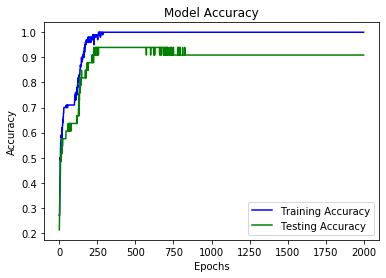

In [17]:
train_acc = history.history["acc"]
valid_acc = history.history["val_acc"]
epochs = range(2000)

plt.plot(epochs, train_acc, "b", label="Training Accuracy")
plt.plot(epochs, valid_acc, "g", label="Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

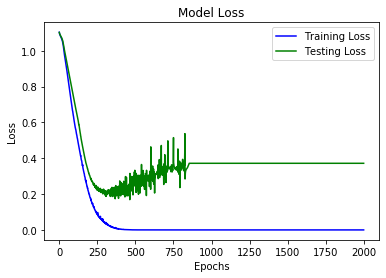

In [18]:
plt.plot(epochs, history.history["loss"], "b", label="Training Loss")
plt.plot(epochs, history.history["val_loss"], "g", label="Testing Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

### 3.1 Most Optimal Weights and Biases within each layer 

In [19]:
from keras.models import load_model
model = load_model('best_model.hdf5')
for num, layer in enumerate(model.layers):
    if len(layer.weights) > 0:
        print(layer.name)
        print("weights", model.layers[num].get_weights()[0], "\n")
        print("bias", model.layers[num].get_weights()[1], "\n")
        print("=====================================================")

dense_1
weights [[-0.01539512  0.0749163   0.76372623  0.01835181 -0.67910975  0.00585896
  -0.190994   -0.48422405  0.6832247   0.18934597]
 [ 0.0157333  -0.8341285   0.24240138  0.4154011  -0.16060044  0.10875841
  -0.48032    -0.35439467  0.10528497  0.13425802]
 [ 0.09323727 -0.50196236  0.5851766   0.44501507  0.28718877 -0.26129198
   0.10212255  0.2489605   0.78787464  0.4594484 ]
 [-0.0740436   0.2202187   0.22579855  0.12288422  0.6360754   0.3861462
  -0.13393277 -0.12946016  0.43065816  0.44271246]
 [ 0.41673872  0.6086401   0.19122694  0.16075161  0.35629097 -0.06266499
   0.01011556 -0.11864257  0.6574762  -0.4519923 ]
 [-0.33559763 -0.11348654 -0.19878198  0.23346868  0.7550473  -0.21475385
   0.05266488 -0.19966036  0.52130187  0.07051543]
 [-0.5207171  -0.2493852  -0.3031495  -1.0989988   0.20586525 -0.23606677
  -0.42029005 -0.08788702  0.2770822   0.43901289]
 [-0.14384317  0.00710993  0.13996354  0.22750983 -0.48631054  0.13441546
  -0.4551256  -0.18228418 -0.5947579

# 4. Testing Model 

In [20]:
evalModel = Sequential()
evalModel.add(Dense(10, input_dim=13,activation='relu'))
evalModel.add(Dense(8, activation='relu'))
evalModel.add(Dense(6, activation='relu'))
evalModel.add(Dense(6, activation='relu'))
evalModel.add(Dense(4, activation='relu'))
evalModel.add(Dense(3, activation='softmax'))

evalModel.summary()

evalModel.load_weights('best_model.hdf5')
evalModel.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 15        
Total params: 367
Trainable params: 367
Non-trainable params: 0
________________________________________________________

In [21]:
lossAndAcc = evalModel.evaluate(xtest, ytest)
print("Loss=", lossAndAcc[0])
print("Accuracy=", lossAndAcc[1])

45/45 [==============================] - 0s 894us/step
Loss= 0.21534144630034766
Accuracy= 0.9555555582046509


## 4. Use 20%, 30%, 40%, 50%, 60%, 70%,80%,90%,100% of the total training dataset to train the neural work and test on it respectively

In [22]:
train_sizes = [0.20, 0.30, 0.40, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
acc = []

# xtrain, xtest, ytrain, ytest = train_test_split(features, labels)
# ytrain = to_categorical(ytrain, 3)
# ytest = to_categorical(ytest,3)

# print("xtrain", xtrain.shape)
# print("xtest", xtest.shape)
# print("ytrain", ytrain.shape)
# print("ytest", ytest.shape)


In [23]:
# rand_idx = np.random.permutation(ytrain.shape[0])
# train_idx = rand_idx[0:100]
# valid_idx = rand_idx[100:133]

# xval = xtrain[valid_idx,:]
# yval = ytrain[valid_idx,:]

# xtr = xtrain[train_idx, :]
# ytr = ytrain[train_idx,:]

# print("Shape of xtrain: ", xtr.shape)
# print("Shape of ytrain: ", ytr.shape)
# print("Shape of xval: ", xval.shape)
# print("Shape of yval: ", yval.shape)

We can stop the learning process at around 900 epoch

We can stop the learning process at around 900 epoch